### Pandas Lab -- Cleaning, Merging, & Grouping

This lab is designed to introduce students to common use cases for Pandas when working with data:

 - Creating new information out of your existing data set
 - Merging, concatenating, and joining different data sources
 - Grouping -- With both time & non-time based data

### Section I: Creating Data Out of Your Existing Columns

Go ahead and create the following columns in your dataset.

**Column 1:**

  - **Column Name:** Profitable
  - **Values:** `True` if `Profit` > 0, `False` if not.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('../../data/superstore.xls')

In [3]:
df['Profitable'] = df['Profit'] > 0
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profitable
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,True
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,True
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,True
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,False
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,True


**Column 2:**

 - **Column Name:** Expected Ship Time
 - **Values:**
   - `0` if `Ship Mode` == `Same Day`
   - `2` if `Ship Mode` == `First Class`
   - `3` if `Ship Mode` == `Second Class`
   - `6` if `Ship Mode` == `Standard Class`
   - `-1` if none of the above.

In [4]:
conds = [df['Ship Mode'] == 'Same Day',
        df['Ship Mode'] == 'First Class',
        df['Ship Mode'] == 'Second Class',
        df['Ship Mode'] == 'Standard Class']
res = [0, 2, 3, 6]
df['Expected Ship Time'] = np.select(conds, res, -1)
df['Expected Ship Time']

0       3
1       3
2       3
3       6
4       6
       ..
9989    3
9990    6
9991    6
9992    6
9993    3
Name: Expected Ship Time, Length: 9994, dtype: int32

**Column 3:**

 - **Column Name:** Actual Ship Time
 - **Values:**
   - `Ship Date` - `Order Date`
 - **Note:** When you subtract these columns, your column will be a **time delta**.  See if you can use the `dt` attribute to convert these values into an integer.  Ie, if your value reads `3 days`, you want that to be 3 instead.  You can read more about different time periods in pandas here:  https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

In [5]:
df['Actual Ship Time'] = df['Ship Date'] - df['Order Date']

In [6]:
df['Actual Ship Time'] = df['Actual Ship Time'].dt.days

**Column 4:**

 - **Column Name:** Late
 - **Values:** `True` if `Actual Ship Time` > `Expected Ship Time`, `False` otherwise

In [7]:
df['Late'] = df['Actual Ship Time'] > df['Expected Ship Time']
#df['Late']

### Section II: Merging Dataframes

This excel spreadsheet has 3 separate sheets.  Look up the documentation on the `pd.read_excel` method on how to load in the other two.  

After that, merge the other two dataframes into your original one, and make sure your original dataset now has the following columns:

 - **Salesperson:** This is the Salesperson in charge of each region.
 - **Returned:** This details whether or not the order was returned.  Fill in null values with the value `no`.
 
Use the `drop()` method if you need to get rid of redundant columns.

**Important:** We want to keep all of the rows in the dataset we first loaded in.  After each merge, it's a good idea to make sure your dataset hasn't shrunk, which will happen if you don't choose the right merge type.  Make sure you have 9,994 rows when you're finished!

In [8]:
df2 = pd.read_excel('../../data/superstore.xls', sheet_name=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [9]:
df3 = pd.read_excel('../../data/superstore.xls', sheet_name=2)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  4 non-null      object
 1   Region  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [10]:
superstore = pd.merge(df, df2, on='Order ID', how='left' )
superstore = superstore.merge(df3, on='Region', how='left')
superstore['Returned'] = superstore['Returned'].fillna('No')
superstore.head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profitable,Expected Ship Time,Actual Ship Time,Late,Returned,Person
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,True,3,3,False,No,Cassandra Brandow
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,True,3,3,False,No,Cassandra Brandow
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,True,3,4,True,No,Anna Andreadi
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,False,6,7,True,No,Cassandra Brandow
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,True,6,7,True,No,Cassandra Brandow
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,48.8600,7,0.00,14.1694,True,6,5,False,No,Anna Andreadi
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,7.2800,4,0.00,1.9656,True,6,5,False,No,Anna Andreadi
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,907.1520,6,0.20,90.7152,True,6,5,False,No,Anna Andreadi
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,18.5040,3,0.20,5.7825,True,6,5,False,No,Anna Andreadi
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,114.9000,5,0.00,34.4700,True,6,5,False,No,Anna Andreadi


In [39]:
superstore.shape

(9994, 28)

### Section III: Grouping

Use the `groupby` or `resample` method to answer the following questions.

**Question 1:** What salesperson had the highest average sales amount? 

In [11]:
superstore.groupby('Person')['Sales'].mean().sort_values(ascending=False)

Person
Cassandra Brandow    241.803645
Chuck Magee          238.336110
Anna Andreadi        226.493233
Kelly Williams       215.772661
Name: Sales, dtype: float64

**Question 2:** Within each ship mode, compare how likely late orders were to be profitable or not

In [12]:
superstore.groupby(['Ship Mode', 'Late'])['Profitable'].mean()

Ship Mode       Late 
First Class     False    0.795405
                True     0.814103
Same Day        False    0.813102
                True     0.916667
Second Class    False    0.845415
                True     0.827500
Standard Class  False    0.794651
                True     0.805153
Name: Profitable, dtype: float64

**Question 3:** What ship mode had the most consistently on time orders?

In [13]:
superstore.groupby('Ship Mode')['Late'].mean()

Ship Mode
First Class       0.405722
Same Day          0.044199
Second Class      0.411311
Standard Class    0.104055
Name: Late, dtype: float64

**Question 4:** For each sales person, get their average, median, max, and count of their sales.

In [40]:
superstore.groupby('Person')['Sales'].agg(['mean', 'median', 'max', 'count'])

,mean,median,max,count
Person,,,,
Anna Andreadi,226.493233,60.840,13999.960,3203
Cassandra Brandow,241.803645,54.594,22638.480,1620
Chuck Magee,238.336110,54.900,11199.968,2848
Kelly Williams,215.772661,45.980,17499.950,2323


**Question 5:** Group your dataset according to  `Region`, and `Category`, and then call the `describe()` method to get the summary statistics for each subgroup.

In [16]:
superstore.groupby(['Region', 'Category']).describe()

Row ID                                           \
                          count         mean          std    min     25%   
Region  Category                                                           
Central Furniture         481.0  5198.831601  2965.518718   37.0  2788.0   
        Office Supplies  1422.0  5025.764416  2890.995980   15.0  2601.5   
        Technology        420.0  4854.019048  2980.905419   36.0  2045.0   
East    Furniture         601.0  4976.960067  2927.036861   24.0  2330.0   
        Office Supplies  1712.0  4926.139019  2971.616543   29.0  2194.5   
        Technology        535.0  4951.805607  2892.183235   48.0  2432.5   
South   Furniture         332.0  5019.783133  2848.584072    1.0  2699.5   
        Office Supplies   995.0  5105.296482  2778.947757    5.0  2693.0   
        Technology        293.0  5006.679181  2774.039447  107.0  2780.0   
West    Furniture         707.0  4999.953324  2814.077939    6.0  2614.5   
        Office Supplies  1897.0  4929.139694  2841.198338    3.0  2450.0   
        Technology        599.0  5152.409015  2910.770129    8.0  2720.5   

                                                 Postal Code                \
                            50%      75%     max       count          mean   
Region  Category                                                             
Central Furniture        5168.0  7949.00  9963.0       481.0  65486.453222   
        Office Supplies  4948.0  7584.50  9983.0      1422.0  65275.734880   
        Technology       4793.0  7373.75  9984.0       420.0  65393.026190   
East    Furniture        4826.0  7562.00  9965.0       601.0  17317.247920   
        Office Supplies  4929.0  7513.25  9986.0      1712.0  17401.548481   
        Technology       5040.0  7420.00  9947.0       535.0  18640.338318   
South   Furniture        5322.0  7405.50  9990.0       332.0  34552.117470   
        Office Supplies  5053.0  7519.50  9972.0       995.0  34243.389950   
        Technology       4912.0  7479.00  9989.0       293.0  35261.351536   
West    Furniture        5145.0  7360.00  9991.0       707.0  91680.442716   
        Office Supplies  4895.0  7319.00  9994.0      1897.0  91769.716921   
        Technology       5401.0  7669.50  9992.0       599.0  91543.449082   

                         ... Expected Ship Time      Actual Ship Time  \
                         ...                75%  max            count   
Region  Category         ...                                            
Central Furniture        ...                6.0  6.0            481.0   
        Office Supplies  ...                6.0  6.0           1422.0   
        Technology       ...                6.0  6.0            420.0   
East    Furniture        ...                6.0  6.0            601.0   
        Office Supplies  ...                6.0  6.0           1712.0   
        Technology       ...                6.0  6.0            535.0   
South   Furniture        ...                6.0  6.0            332.0   
        Office Supplies  ...                6.0  6.0            995.0   
        Technology       ...                6.0  6.0            293.0   
West    Furniture        ...                6.0  6.0            707.0   
        Office Supplies  ...                6.0  6.0           1897.0   
        Technology       ...                6.0  6.0            599.0   

                                                                      
                             mean       std  min  25%  50%  75%  max  
Region  Category                                                      
Central Furniture        3.979210  1.713787  0.0  3.0  4.0  5.0  7.0  
        Office Supplies  4.120253  1.707383  0.0  3.0  4.0  5.0  7.0  
        Technology       3.938095  1.586331  0.0  3.0  4.0  5.0  7.0  
East    Furniture        3.850250  1.747628  0.0  3.0  4.0  5.0  7.0  
        Office Supplies  3.937500  1.724834  0.0  3.0  4.0  5.0  7.0  
        Technology       3.882243  1.720977  0.0 

**Question 6:** Use the `Resample()` method to get the sum of sales for each quarter.

In [17]:
quarterly_sales = superstore.resample('Q', on='Order Date')['Sales'].sum()
quarterly_sales

Order Date
2014-03-31     74447.7960
2014-06-30     86538.7596
2014-09-30    143633.2123
2014-12-31    179627.7302
2015-03-31     68851.7386
2015-06-30     89124.1870
2015-09-30    130259.5752
2015-12-31    182297.0082
2016-03-31     93237.1810
2016-06-30    136082.3010
2016-09-30    143787.3622
2016-12-31    236098.7538
2017-03-31    123144.8602
2017-06-30    133764.3720
2017-09-30    196251.9560
2017-12-31    280054.0670
Freq: Q-DEC, Name: Sales, dtype: float64

In [18]:
type(superstore.resample('Q', on='Order Date'))

pandas.core.resample.DatetimeIndexResampler

**Question 7:** What quarter had the highest total sales amount?

In [19]:
quarterly_sales.idxmax().date(), quarterly_sales[quarterly_sales.idxmax()]

(datetime.date(2017, 12, 31), 280054.06700000004)

**Question 8:** See if you can use the `groupby` method to get a list of yearly sales for each region inside the dataset.

**Hint:** Try using the `dt` attribute of the `Order Date` column.

In [21]:
superstore['Year'] = superstore['Order Date'].dt.year
superstore.groupby(['Region', 'Year'])['Sales'].sum()

Region   Year
Central  2014    103838.1646
         2015    102874.2220
         2016    147429.3760
         2017    147098.1282
East     2014    128680.4570
         2015    156332.0570
         2016    180685.8220
         2017    213082.9040
South    2014    103845.8435
         2015     71359.9805
         2016     93610.2235
         2017    122905.8575
West     2014    147883.0330
         2015    139966.2495
         2016    187480.1765
         2017    250128.3655
Name: Sales, dtype: float64

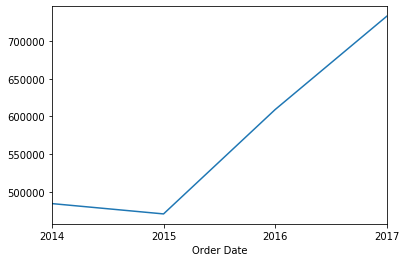

In [45]:
superstore.resample('Y', on='Order Date')['Sales'].sum().plot()

**Bonus:** Creating summary statistics with a `groupby` statement.  

Lots of times it's very useful to be able to create a summary statistic for a particular category to compare with individual samples.

For example, if you were doing fraud detection, and someone were making a purchase at a 7-11, a transaction amount of $175 would be unusually large for someone making a purchase at a convenience store, essentially setting off a red flag that the transaction might be suspicious.

Creating such comparisons is easily done using the `groupby` method and then merging it back into the original dataframe.  

For example, if you wanted to compare every single purchase amount with the average amount for that category, you could do it in the following way:

In [29]:
import pandas as pd
df = pd.read_excel('../../data/superstore.xls')
# create the grouping
cat_grouping = df.groupby('Category')[['Sales']].mean()
# this step is mostly just to make the merged dataframe more tidy
cat_grouping.rename({'Sales': 'Cat_Average'}, axis=1, inplace=True)

In [30]:
# join them
df = df.merge(cat_grouping, left_on='Category', right_index=True)

In [31]:
# and now we can see each purchase amount compared to the average amt
# for that category
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cat_Average
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,349.834887
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,349.834887
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,349.834887
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,349.834887
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,349.834887


So for instance, if wanted to ask ourselves, "which customers consistently punch above their weight when it comes to the actual items that they buy?"

We could easily do the following:

In [32]:
# turn the difference between the two columns into a percent
df['Cat Difference'] = ((df['Sales'] / df['Cat_Average']) - 1) * 100

In [33]:
# now group and sort the values
df.groupby('Customer Name')['Cat Difference'].mean().sort_values(ascending=False)

Customer Name
Mitch Willingham        845.569285
Christopher Martinez    636.313301
Andy Reiter             449.654450
Adrian Barton           418.548520
Sanjit Chand            386.906876
                           ...    
Susan Gilcrest          -91.963736
Roy Skaria              -93.762646
Lela Donovan            -95.554963
Mitch Gastineau         -96.387490
Thais Sissman           -97.974843
Name: Cat Difference, Length: 793, dtype: float64

**Your Turn:** Using a similar methodology as above, figure out the 10 customers who are the most profitable on average, when compared to the subcategory that they purchased from.

If you wanted, you could also limit this to customers who only made a minimum number of purchases as well.

In [34]:
subcat = df.groupby('Sub-Category')[['Profit']].mean()
subcat.rename({'Profit': 'SubCat Average'}, axis=1, inplace=True)
df = df.merge(subcat, left_on='Sub-Category', right_index=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cat_Average,Cat Difference,SubCat Average
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,349.834887,-25.118960,-15.230509
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,349.834887,781.395800,-15.230509
38,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764,349.834887,52.185851,-15.230509
189,190,CA-2015-102281,2015-10-12,2015-10-14,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",899.1360,4,0.20,112.3920,349.834887,157.017248,-15.230509
192,193,CA-2015-102281,2015-10-12,2015-10-14,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",626.3520,3,0.20,46.9764,349.834887,79.042178,-15.230509


In [35]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cat_Average,Cat Difference,SubCat Average
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,349.834887,-25.118960,-15.230509
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,349.834887,781.395800,-15.230509
38,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764,349.834887,52.185851,-15.230509
189,190,CA-2015-102281,2015-10-12,2015-10-14,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",899.1360,4,0.20,112.3920,349.834887,157.017248,-15.230509
192,193,CA-2015-102281,2015-10-12,2015-10-14,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",626.3520,3,0.20,46.9764,349.834887,79.042178,-15.230509


In [36]:
df['SubCat Diff'] = (df['Profit'] / df['SubCat Average'] - 1) * 100

In [38]:
# now group customers according to the column you just made
top_custs = df.groupby('Customer Name')['SubCat Diff'].mean()
# and sort the values + show the top 10 -- Mitch is a high roller.....
top_custs.sort_values(ascending=False).head(10)

Customer Name
Mitch Willingham        2404.056459
Christopher Martinez    1862.436871
Jim Radford             1628.279903
Andy Reiter             1373.983641
Adrian Barton           1337.826612
Sanjit Chand            1236.837470
Alex Avila              1202.507813
Bill Shonely             880.808891
Sanjit Engle             750.951436
Jenna Caffey             728.799638
Name: SubCat Diff, dtype: float64

In [48]:
import pyarrow as pa

AttributeError: module 'pyarrow' has no attribute 'compat'

In [1]:
import feather

ImportError: DLL load failed: The specified module could not be found.